In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Some Calculations

In [2]:
path = './dataset/HzAGN_Groups_0_3_noMcut_InfallTime_matched.csv'
dataset = pd.read_csv(path)

## Velocity disperiosn

In [3]:
dataset['sigma'] = np.sqrt(dataset['sigma_vx']**2 + dataset['sigma_vy']**2 + dataset['sigma_vz']**2)

## Time Since Infall

In [4]:
dataset['t(Gyr)'] = dataset['t(Myr)[col2]']*1e-9

In [5]:
infalls = []
for time in dataset['t(Gyr)']:
    if time <= 0:
        infalls.append('first')
    elif 0 <  time <= 3.63:
        infalls.append('recent')
    elif 3.63 < time <= 6.45:
        infalls.append('intermediate')
    elif 6.45 <   time:
        infalls.append('ancient')

dataset['infalling'] = infalls       

## Categorize

In [6]:
def categorize (z, logMh):
    if ((0.07 <= z <= 0.40) and (12.65 <= logMh <= 13.30)):
        return'S-I'
    elif ((0.07 <= z <= 0.40) and (13.30 < logMh <= 14.50)):
        return'S-II'
    elif ((0.40 < z <= 0.70) and (13.30 <= logMh <= 14.50)):
        return'S-III'
    elif ((0.70 < z <= 1) and (13.30 <= logMh <= 14.50)):
        return'S-IV'
    else:
        return np.nan

In [7]:
dataset['category'] = dataset.apply(lambda row: categorize(row['z[4]'], row['Mtotgroup[25]']), axis=1)

## Offset

In [8]:
def offset(Ra, Dec, Ra0, Dec0):
    # Ra_deg = Ra * 180/np.pi
    # Dec_deg = Dec * 180/np.pi
    # Ra0_deg = Ra0 * 180/np.pi 
    # Dec0_deg = Dec0 * 180/np.pi 

    # Ra_deg = np.rad2deg(Ra)
    # Dec_deg = np.rad2deg(Dec)
    # Ra0_deg = np.rad2deg(Ra0)
    # Dec0_deg = np.rad2deg(Dec0) 

    # x = (Ra_deg - Ra0_deg)*np.cos(Dec0)
    # y = Dec_deg - Dec0_deg

    x = (Ra - Ra0)*np.cos(np.deg2rad(Dec0))
    y = Dec - Dec0

    return np.sqrt(x**2 + y**2)


In [9]:
offset_ex = offset(dataset['Ra'], dataset['Dec'], dataset['Ragroup'], dataset['Decgroup'])
offset_ex = offset_ex/dataset['Rvir_deg']


In [10]:
dataset['offset_ex'] = offset_ex

In [11]:
dataset.to_csv('dataset.csv')

# Phase Space Plot

In [12]:
path = './dataset.csv'
dataset = pd.read_csv(path)

C:\Users\haleh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (111) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
dataset = dataset[dataset['t(Myr)[col2]'] != 0]

In [14]:
dataset = dataset[dataset['rank'] != 3]

In [15]:
dataset_gID = dataset.groupby('GroupID')

In [16]:
dataset['GroupID'].loc[dataset['GroupSize'] == 242]

12133    611
12135    611
12137    611
12138    611
12139    611
12142    611
12143    611
12144    611
12147    611
12148    611
12161    611
Name: GroupID, dtype: int64

In [17]:
group = dataset_gID.get_group(611)

In [18]:
dataset['infalling'].value_counts()

recent          13489
intermediate     1351
ancient           573
first               5
Name: infalling, dtype: int64

C:\Users\haleh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


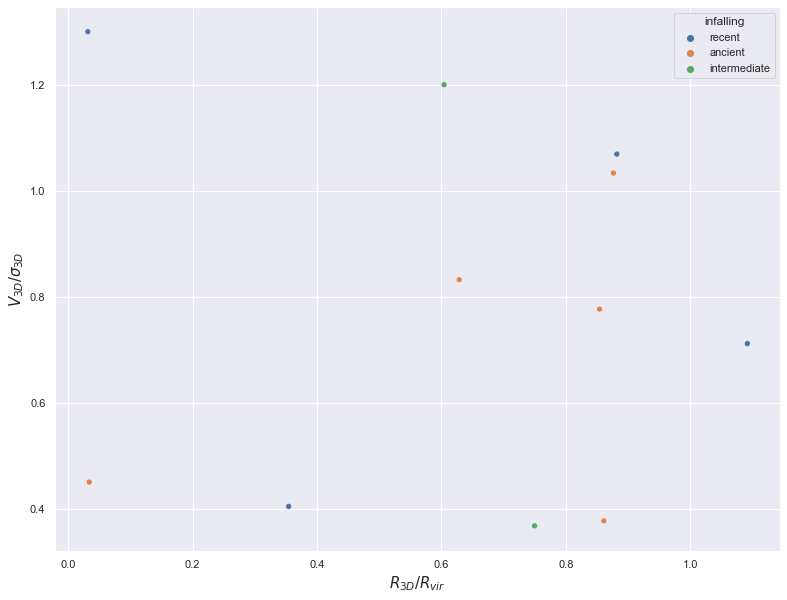

In [19]:
x = group['offset']
y = group['velgal']/group['sigma']

# colors = {'first':"blue", 'recent':"green", 'intermediate':"orange", 'ancient':"red"}

df = pd.DataFrame(dict(x = x, y = y, infalling = group['infalling']))
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.scatterplot('x', 'y', data=df, hue='infalling')
ax.set_xlabel("$R_{3D} / R_{vir}$", fontsize = 15)
ax.set_ylabel("$V_{3D} / \sigma_{3D}$", fontsize = 15)

plt.show()

In [20]:
SI = dataset[dataset['category'] == 'S-I']
SII = dataset[dataset['category'] == 'S-II']
SIII = dataset[dataset['category'] == 'S-III']
SIV  = dataset[dataset['category'] == 'S-IV']

In [21]:
SI = SI[SI['offset']<=1]
SII = SII[SII['offset']<=1]
SIII = SIII[SIII['offset']<=1]
SIV = SIV[SIV['offset']<=1]

In [22]:
SI.head()

,Unnamed: 0,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],...,sigma_vx,rank_gg,offset,GroupID,GroupSize,sigma,t(Gyr),infalling,category,offset_ex
10468,10468,1009800,1,13542,951484,-0.42072,0.06285,0.38027,0.0,0.0,...,219.413615,0,0.308048,541,20,436.288255,7.667491,ancient,S-I,0.308048
10471,10471,1009800,1,13546,951551,-0.41213,0.04895,0.38020,0.0,0.0,...,219.413615,0,0.483707,541,20,436.288255,4.746220,intermediate,S-I,0.483708
10473,10473,1009800,1,13548,951553,-0.41009,0.05283,0.38020,0.0,0.0,...,219.413615,0,0.489012,541,20,436.288255,8.036938,ancient,S-I,0.489013
10475,10475,1009800,1,13550,951555,-0.42153,0.06588,0.38021,0.0,0.0,...,219.413615,0,0.439348,541,20,436.288255,4.989937,intermediate,S-I,0.439348
10476,10476,1009800,1,13551,951556,-0.43370,0.04986,0.38025,0.0,0.0,...,219.413615,0,0.605458,541,20,436.288255,6.964152,ancient,S-I,0.605458


In [23]:
frames = [SI, SII, SII, SIV]

In [24]:
S = pd.concat(frames)

C:\Users\haleh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


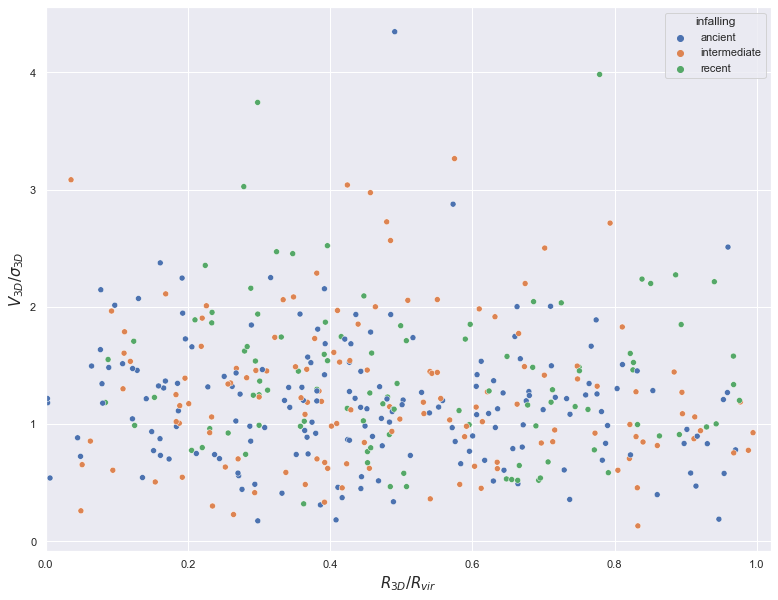

In [25]:
x = SI['offset']
y = SI['velgal']/SI['sigma']

# colors = {'first':"blue", 'recent':"green", 'intermediate':"orange", 'ancient':"red"}

df = pd.DataFrame(dict(x = x, y = y, infalling = SI['infalling']))
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.scatterplot('x', 'y', data=df, hue='infalling')
ax.set_xlabel("$R_{3D} / R_{vir}$", fontsize = 15)
ax.set_ylabel("$V_{3D} / \sigma_{3D}$", fontsize = 15)
ax.set_xlim(0,1.02)

plt.show()

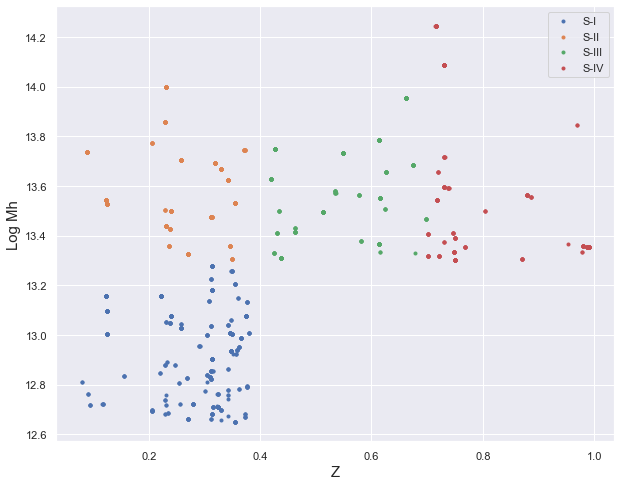

In [26]:
SI = dataset[dataset['category'] == 'S-I']
SII = dataset[dataset['category'] == 'S-II']
SIII = dataset[dataset['category'] == 'S-III']
SIV = dataset[dataset['category'] == 'S-IV']

plt.figure(figsize=(10,8))
plt.scatter(SI['z[4]'], SI['Mtotgroup[25]'], marker='.', label = 'S-I')
plt.scatter(SII['z[4]'], SII['Mtotgroup[25]'], marker='.', label = 'S-II')
plt.scatter(SIII['z[4]'], SIII['Mtotgroup[25]'], marker='.', label = 'S-III')
plt.scatter(SIV['z[4]'], SIV['Mtotgroup[25]'], marker='.', label = 'S-IV')
plt.xlabel('Z', fontsize=15)
plt.ylabel('Log Mh', fontsize=15)
plt.legend()

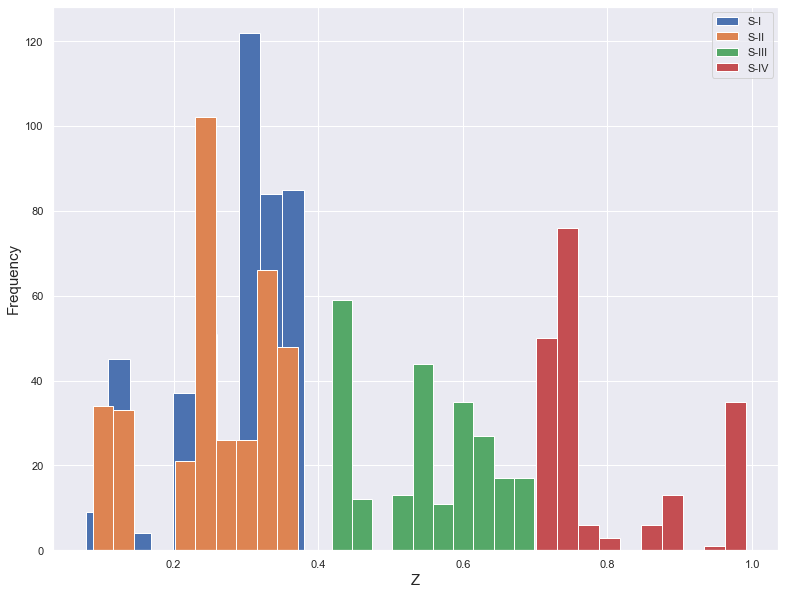

In [27]:
plt.hist(SI['z[4]'], label='S-I')
plt.hist(SII['z[4]'], label='S-II')
plt.hist(SIII['z[4]'], label='S-III')
plt.hist(SIV['z[4]'], label='S-IV')

plt.xlabel('Z', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()

In [28]:
SI.head()

,Unnamed: 0,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],...,sigma_vx,rank_gg,offset,GroupID,GroupSize,sigma,t(Gyr),infalling,category,offset_ex
10468,10468,1009800,1,13542,951484,-0.42072,0.06285,0.38027,0.0,0.0,...,219.413615,0,0.308048,541,20,436.288255,7.667491,ancient,S-I,0.308048
10471,10471,1009800,1,13546,951551,-0.41213,0.04895,0.38020,0.0,0.0,...,219.413615,0,0.483707,541,20,436.288255,4.746220,intermediate,S-I,0.483708
10473,10473,1009800,1,13548,951553,-0.41009,0.05283,0.38020,0.0,0.0,...,219.413615,0,0.489012,541,20,436.288255,8.036938,ancient,S-I,0.489013
10475,10475,1009800,1,13550,951555,-0.42153,0.06588,0.38021,0.0,0.0,...,219.413615,0,0.439348,541,20,436.288255,4.989937,intermediate,S-I,0.439348
10476,10476,1009800,1,13551,951556,-0.43370,0.04986,0.38025,0.0,0.0,...,219.413615,0,0.605458,541,20,436.288255,6.964152,ancient,S-I,0.605458


Text(0.5, 1.0, 'Histogram of age of galaxy for S-I group')

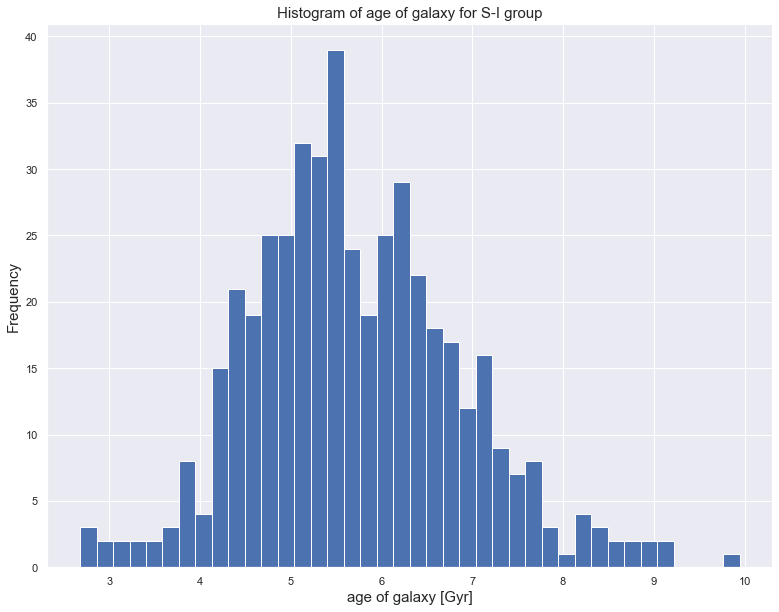

In [29]:
plt.hist(SI['agegal']*1e-9, bins = 40, label='S-I')
plt.xlabel('age of galaxy [Gyr]', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of age of galaxy for S-I group', fontsize=15)

# Some log scale plots

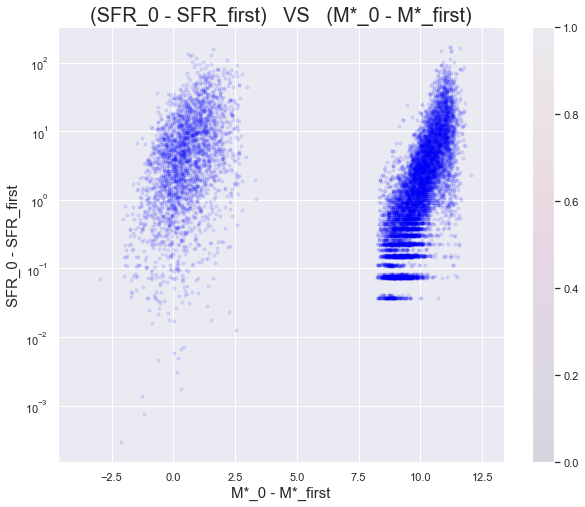

In [30]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x1 = dataset['M*_first[col25]']
x2 = dataset['M*_0[col10]']

x = x2-x1
y = y2-y1

x_label = x2.name.split('[')[0] + ' - ' + x1.name.split('[')[0] 
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0] 

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.colorbar()

Text(0, 0.5, 'Mh_first')

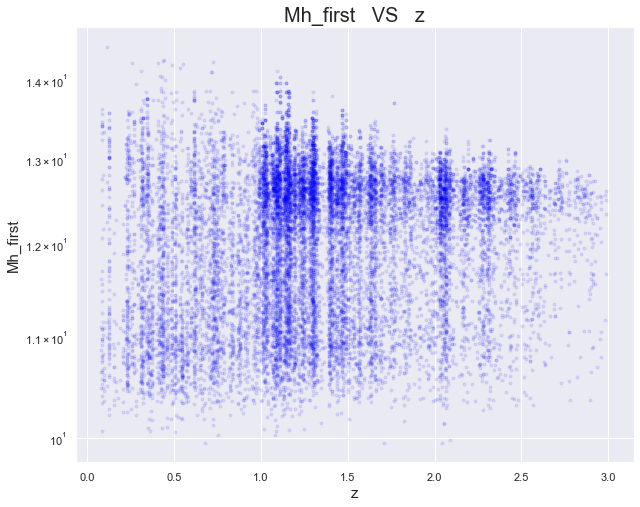

In [31]:
y = dataset['Mh_first[col24]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x, y, marker='.', c='blue', alpha=0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_0 - M*_first')

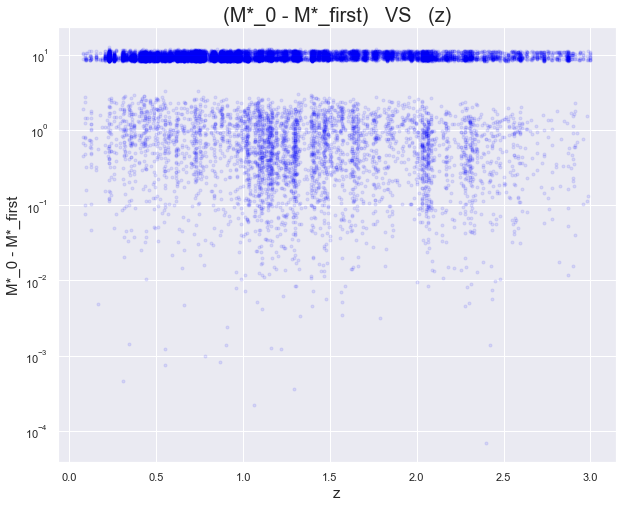

In [32]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x = dataset['z[4]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0.5, 0, 't(Myr)')

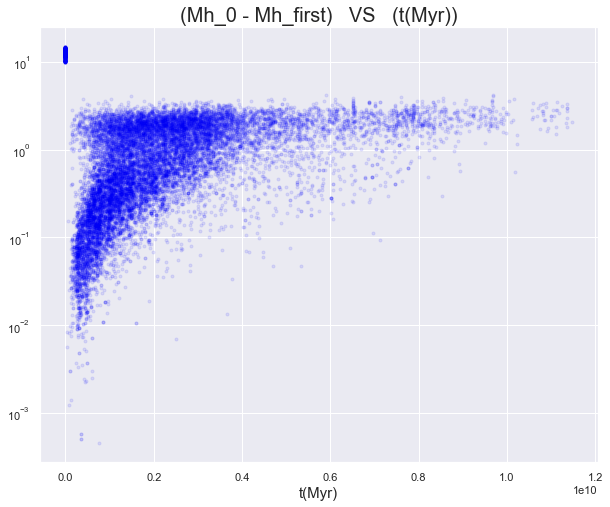

In [33]:
y1 = dataset['Mh_first[col24]']
y2 = dataset['Mh_0[col9]']
x = dataset['t(Myr)[col2]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha = 0.09)
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

What is limitation? When quenching occures?

Text(0, 0.5, 'SFR_0 - SFR_first')

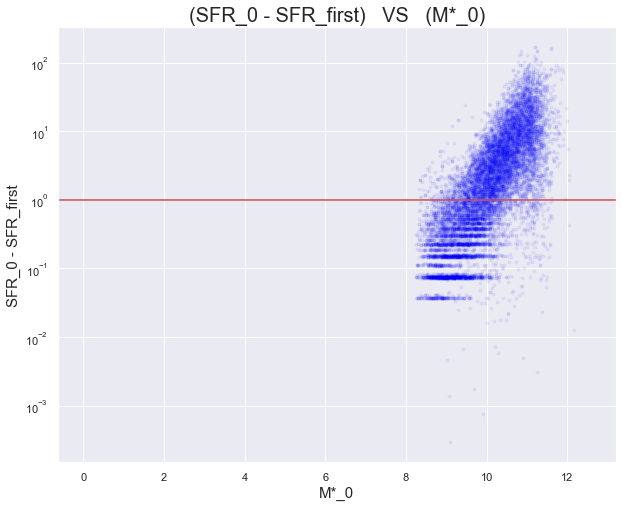

In [34]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['M*_0[col10]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(10,8))
plt.scatter(x,y, marker='.', c='blue', alpha=0.05)
plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.xscale('log')
plt.yscale('log')
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)